# Problem Statement

The time requried for a washing machine to complete a wash cycle is called the wash time and is determined by the soil level of the load, the size of the load, and temperature of the water. The goal is to minimize wash time while ensuring the clothes are clean. If the cycle is too short the clothes will remain soiled, whereas a cycle that is too long is wasteful and inefficient. The soil level is a measure of the amount of contaminents in a sample extracted from the fabric and is measured in parts per million. A higher parts per million measurement results in a longer wash time. The soil level is generally described as high, medium, or low.The load size is a measure of the weight of the load, measured in pounds. Heavier loads require longer wash times. Load size is generally described as small, medium, or large.The water temperateure is a measure of the thermal energy of the water, measured in degrees Celsius. Water temperature is generally described as hot, warm, or cold. Hotter water is more effiective at reducing soil levels and therefore requires a shorter wash time. Washing machine operators do not have precise measurements of these factors. Instead, they use general terms such as "large, highly soiled, warm wash" to describe the conditions of the cycle. The machine then interperts these inputs to determine a wash time that is not wasteful and results in clean clothes.

## System Description
Develop a simple fuzzy control system to produce an output to control the washing time of a washing machine.

Use Anaconda or any other fuzzy system tool of your choice.

output variable :
  - washing time
       - domain (continious): time
       - range: 0-120 minutes


input variables :
  - soil level
       - domain (continious): parts per million
       - range: 0-5000 ppm
       - linguistic variables: low, medium, high
  - load size
       - domain (continious): lbs
       - range: 0-20 lbs
       - linguistic variables: small, medium, large
  - water temperature
       - domain (continous): celsius
       - range: 0-100 C
       - linguistic variables: cold, warm, hot

In [1]:
! pip install scikit-fuzzy

In [2]:
print("Versions of the runtime and packages used for this assignment:")
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import skfuzzy as fuzz
print("scikit-fuzzy version: {}".format(fuzz.__version__))

print("-------------------------------------------------------")
print("When run on my machine the following versions were used:")
print("Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]")
print("pandas version: 2.1.2")
print("matplotlib version: 3.9.2")
print("NumPy version: 1.24.3")
print("scikit-fuzzy version: 0.5.0")

Versions of the runtime and packages used for this assignment:
Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
pandas version: 2.1.2
matplotlib version: 3.9.2
NumPy version: 1.24.3
scikit-fuzzy version: 0.5.0
-------------------------------------------------------
When run on my machine the following versions were used:
Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
pandas version: 2.1.2
matplotlib version: 3.9.2
NumPy version: 1.24.3
scikit-fuzzy version: 0.5.0


### Define domain of input variables

In [3]:
# import libraries
from skfuzzy import control as ctrl

# Each input variable has an associated universe of discourse which represents the range of values that the variable can take on
# Define the universe of discourse for each input variable

# Given the minimum and maximum values for a given domain
# create a range of values that includes all integers less than or equal to the maximum value and greater than or equal to the minimum value
def create_range(minimum_value, maximum_value):
    increment_by_one = 1
    return np.arange(minimum_value, maximum_value + 1, increment_by_one)

zero_parts_per_million = 0
five_thousand_parts_per_million = 5000
soil_level_universe = create_range(
    minimum_value=zero_parts_per_million,
    maximum_value=five_thousand_parts_per_million
)

zero_pounds = 0
twenty_pounds = 20
load_size_universe = create_range(
    minimum_value=zero_pounds,
    maximum_value=twenty_pounds
)

zero_degrees_celcius = 0
one_hundred_degrees_celcius = 100
temperature_universe = create_range(
    minimum_value=zero_degrees_celcius,
    maximum_value=one_hundred_degrees_celcius
)

### Define fuzzy antecedants

In [4]:
# Define the antecedents for each input variable that represent the fuzzy conditions that must be satisfied for a rule in the system to be applied
# Unlike conditions in traditional logic, fuzzy conditions can be partially satisfied
# Instead of "if the soil level is high" we can say "if the soil level is somewhat high"
soil_level = ctrl.Antecedent(soil_level_universe, 'soil_level')
load_size = ctrl.Antecedent(load_size_universe, 'load_size')
water_temperature = ctrl.Antecedent(temperature_universe, 'water_temperature')

### Define the consequent

In [5]:
# Define the universe of discourse for the output variable
one_minute = 1
one_hundred_twenty_minutes = 120
wash_time_universe = create_range(
    minimum_value=one_minute,
    maximum_value=one_hundred_twenty_minutes
)

# Define the consequent that represents the calculation of the output wash time
# The output is calculated when the antecedents are satisfied
wash_time = ctrl.Consequent(wash_time_universe, 'wash_time')

### Define the fuzzy sets

In [6]:
# Define fuzzy sets for each input variable
# Represents categories that don't have precise boundaries
# Unlike traditional sets, fuzzy sets can have elements with partial membership represented by a value between 0 and 1
# For example, a temperature of 30 degrees celcius might be 0.8 in the "cold" set, 0.2 in the "warm" set, and 0 in the "hot" set
soil_level_categories = ['light', 'medium', 'heavy']
load_size_categories = ['small', 'medium', 'large']
temperature_categories = ['cold', 'warm', 'hot']

### Membership functions

> Represents functions that map inputs in the range of the universe of discourse with an output, the degree of membership of a value in a fuzzy set
* Degree of membership is a value between 0 and 1
* A value of 0 indicates no membership, while a value of 1 indicates full membership

#### Trapeziodal Membership function
Subset of range contians a consistent membership value.
Values leading up to the platue gradually have a higher membership.
Values after the platue gradually have a lower membership

```txt
1
|
|       _______
|      /       \
|     /         \
|    /           \
|   /             \
|  /               \
| /                 \
|/                   \
0-----------------------
min  10  20  30  40  max
```

#### Triangular Membership Function
Membership value peaks at a specific input and has a symmetric descrease in membership for values before and after

```txt
1
|
|       /\
|      /  \
|     /    \
|    /      \
|   /        \
|  /          \
| /            \
|/              \
0-------------------
min  10 20 30 40 max
```

#### Guassian Membership Function

Difficult to show with ascii art given its smooth curve.
Tranditional bell curve shape with a center at the mean and smooth, symetric distirbution.



### Membership functions for antecedents

In [7]:
# Define membership functions for the antecedents
# Used to fuzzify the input and relate precise values to degrees of membership in fuzzy sets

# Define a guassian membership function for each of the load size fuzzy sets
# The shape of the membership function is defined by the mean and standard deviation
# This shape is ideal because there are no sharp boundaries between the categories despite the fact that the categories are distinct
# The mean is the center of the distribution and the standard deviation is the spread of the distribution

ten_pounds = 10

load_size['small'] = fuzz.gaussmf(load_size.universe, mean=zero_pounds, sigma=2)
load_size['medium'] = fuzz.gaussmf(load_size.universe, mean=ten_pounds, sigma=2)
load_size['large'] = fuzz.gaussmf(load_size.universe, mean=twenty_pounds, sigma=2)


# Define a left-shoulder membership function for the cold water temperatures
# Specific type of trapaizoidal membership function that has a plateau at the start of the range and a decrease in membership as the value increases
# There are a range of values with the same membership, called a plateau, and a gradual decrease in membership as the value increases past the end of the plateau
# In other words anything colder than thirty degrees celcius is considered cold despite a difference in temperature

thirty_degrees_celcius = 30
forty_degrees_celcius = 40
fifty_degrees_celcius = 50
sixty_degrees_celcius = 60
seventy_degrees_celcius = 70

# Smallest value in the universe of discourse
water_temperature_range_start = zero_degrees_celcius
# The plateau is the range of values that all have a membership of 1
cold_water_plateau_end = thirty_degrees_celcius
# The slope of a left shoulder shape is the range of values after the plateau where the membership decreases from 1 to 0 gradually
cold_water_slope_end = forty_degrees_celcius
water_temperature['cold'] = fuzz.trapmf(water_temperature.universe, [
    water_temperature_range_start,
    water_temperature_range_start,
    cold_water_plateau_end,
    cold_water_slope_end
])

# Define a triangular membership function for the warm water temperatures
# The shape of the membership function is defined by the three points: start, peak, and end
# It models the degree of membership for warm water because there is a single value with the strongest memberhsip, called a peak, and symmetric decrease in membership away from peak
# In other words fifty degrees celcius is clearly warm and gradually becomes considered cold as the temperature decreases and gradually becomes considered hot as the temperature increases

# The start is the lowest value with a membership of 0
warm_water_start = thirty_degrees_celcius
# The peak is the value with the highest membership
warm_water_peak = fifty_degrees_celcius
# The end is the highest value with a membership of 0
warm_water_end =  seventy_degrees_celcius
water_temperature['warm'] = fuzz.trimf(water_temperature.universe, [
    warm_water_start,
    warm_water_peak,
    warm_water_end
])

# Define a right-shoulder membership function for the hot water temperatures
# Specific type of trapaizoidal membership function that has a plateau at the end of the range and an descrease in membership as the value decreases
# There are a range of values with the same membership, called a plateau, and a decrease in membership as the value decreases past the start of the plateau
# In other words, Similar to cold water anything hotter than fifty degrees celcius is considered hot despite a difference in temperature

# The end is the highest value in the universe of discourse
water_temperature_range_end = one_hundred_degrees_celcius

# The plateau is the range of values that all have a membership of 1
hot_water_plateau_start = seventy_degrees_celcius
# The slope of a right shoulder shape is the range of values before the plateau where the membership increases from 0 to 1 gradually
hot_water_slope_start = sixty_degrees_celcius
water_temperature['hot'] = fuzz.trapmf(water_temperature.universe, [
    hot_water_slope_start,
    hot_water_plateau_start,
    water_temperature_range_end,
    water_temperature_range_end
])

# Define a triangular membership function for each of the soil level fuzzy sets
# There are specific input values that strongly represent memebership in a set.
# This was also choosen for simplicity
soil_level.automf(names=soil_level_categories)

### Visualize antecendent membership functions

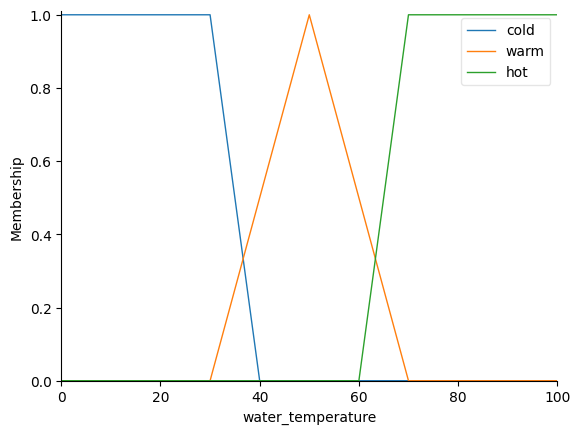

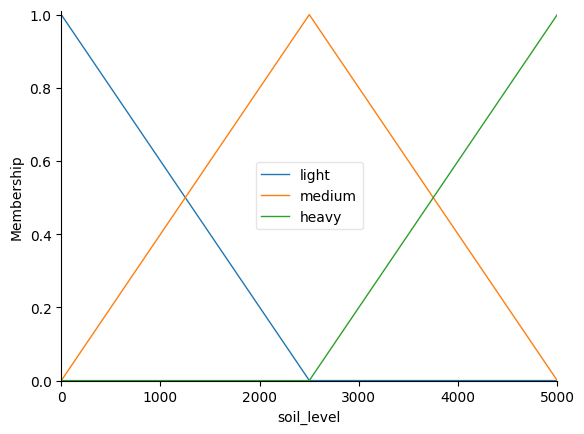

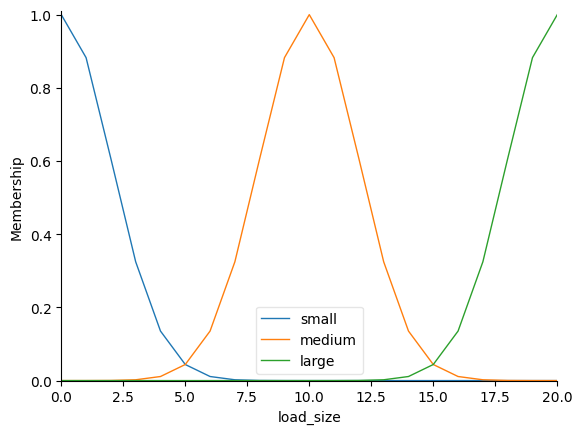

In [8]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="skfuzzy.control.fuzzyvariable")


# Visualize the membership functions
water_temperature.view()
soil_level.view()
load_size.view()


### Membership functions for consequent

In [9]:
# Define membership functions for the consequent.
# Represents how the output variable relates to a degree of membership in a fuzzy set.
# Unlike, membership functions for antecedents,
#  this membership function is used to defuzzify the output to output a percise wash time

# A Left-Right-Shoulder membership function will be used where the plateau extends on the right side indefinitely and to left indefinitely
# This should model the perception that anything greater than X minutes is preceived as long and increases in duration past X don't signficantly change the perception.
# Similarly, anything less than Y minutes is perceived as short and decreases in duration past Y don't significantly change the perception.

zero_minutes = 0
minimum_wash_time = zero_minutes
maximum_wash_time = one_hundred_twenty_minutes
short_duration_threshold = 30
short_duration_slope_end = 40
long_duration_threshold = 60
long_duration_slope_start = 50

# Define a left-should trapezodal membership funciton
# Any wash time shorter than 30 minutes is considered short despite changes in duration
wash_time['short'] = fuzz.trapmf(wash_time.universe, [
    minimum_wash_time,
    minimum_wash_time,
    short_duration_threshold,
    short_duration_slope_end
])
# Define a right-should trapezodal membership funciton
# Any wash time longer than 60 minutes is considered long despite changes in duration
wash_time['long'] = fuzz.trapmf(wash_time.universe, [
    long_duration_slope_start,
    long_duration_threshold,
    maximum_wash_time,
    maximum_wash_time
])

# Medium wash time has a trapezoidal membership function
# This models the perception that a medium wash time is between a short and long wash time with some range of wash times that are all equally considered a medium wash time
medium_duration_slope_start = 25
medium_duration_slope_end = 65
wash_time['medium'] = fuzz.trapmf(wash_time.universe, [
    medium_duration_slope_start,
    short_duration_threshold,
    long_duration_threshold,
    medium_duration_slope_end,
])

### Visualize consequent membership function

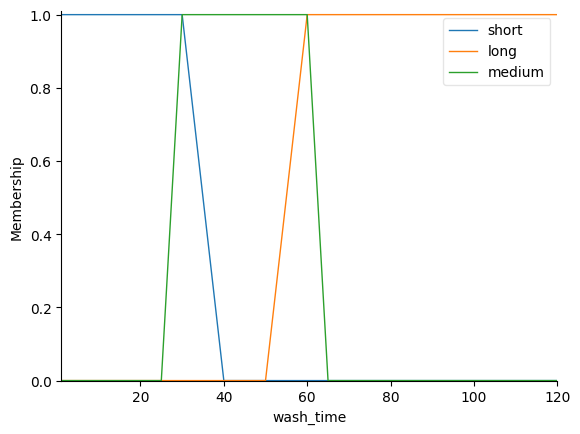

In [10]:
wash_time.view()

### Define the rules for the controller

In [11]:
# Create a dictionary to map wash cycle descriptions to wash time categories
# This will be used to generate rules for the fuzzy logic controller
wash_time_category_by_wash_cycle_description = {
    ('light', 'small', 'cold'): 'short',
    ('light', 'small', 'warm'): 'short',
    ('light', 'small', 'hot'): 'short',
    ('light', 'medium', 'cold'): 'medium',
    ('light', 'medium', 'warm'): 'medium',
    ('light', 'medium', 'hot'): 'short',
    ('light', 'large', 'cold'): 'long',
    ('light', 'large', 'warm'): 'medium',
    ('light', 'large', 'hot'): 'short',
    ('medium', 'small', 'cold'): 'medium',
    ('medium', 'small', 'warm'): 'medium',
    ('medium', 'small', 'hot'): 'short',
    ('medium', 'medium', 'cold'): 'long',
    ('medium', 'medium', 'warm'): 'medium',
    ('medium', 'medium', 'hot'): 'medium',
    ('medium', 'large', 'cold'): 'long',
    ('medium', 'large', 'warm'): 'long',
    ('medium', 'large', 'hot'): 'medium',
    ('heavy', 'small', 'cold'): 'long',
    ('heavy', 'small', 'warm'): 'medium',
    ('heavy', 'small', 'hot'): 'medium',
    ('heavy', 'medium', 'cold'): 'long',
    ('heavy', 'medium', 'warm'): 'long',
    ('heavy', 'medium', 'hot'): 'medium',
    ('heavy', 'large', 'cold'): 'long',
    ('heavy', 'large', 'warm'): 'long',
    ('heavy', 'large', 'hot'): 'medium'
}

# Given a wash cycle description, generate a rule for the fuzzy logic controller
# The conditions of the rule will determined by the fuzzy sets of the input variables
# The consequent of the rule will be the target wash time
def generate_rule_for(wash_cycle_description):
    soil_level_category, load_size_category, water_temperature_category = wash_cycle_description
    wash_cycle_conditions = (
        soil_level[soil_level_category] &
        load_size[load_size_category] &
        water_temperature[water_temperature_category]
    )
    wash_time_category = wash_time_category_by_wash_cycle_description[wash_cycle_description]
    target_wash_time = wash_time[wash_time_category]
    return ctrl.Rule(wash_cycle_conditions, target_wash_time)

# Generate rules for all possible wash cycle descriptions
rules = [
    generate_rule_for(wash_cycle_description)
    for wash_cycle_description
    in wash_time_category_by_wash_cycle_description
]


In [12]:
# Create a control system and simulation using Mamdani inference
washing_control_system = ctrl.ControlSystem(rules)
washing_simulation = ctrl.ControlSystemSimulation(washing_control_system)

### Simulate wash times given precise inputs

The `compute` method applies centroid defuzzification to convert the fuzzy output to a precise value.
Centroid defuzzification one defuzzification strategy among many that uses clustering techniques.
The computation outputs the center of gravity for a fuzzy set which is an x-axis value from the universe of discourse for the fuzzy set. Therefore, the output is a precise value.
The center of gravity is computed as a ratio. The numerator accounts for the contribution of each value in the universe of discourse based on its membership degree. A membership value of zero means the point does not contribute whereas as a membership value of one means the point fully contributes. The denominator is the sum of all membership degrees which considers the total membership of the fuzzy set. 

In [13]:
# Given the precise input values for soil level, load size, and water temperature, return the wash time
def simulate_wash_time_with_precise_input(
        soil_level_value,
        load_size_value,
        water_temperature_value,
    ):
    # Provide inputs to the ControlSystem using Antecedent labels
    washing_simulation.input['soil_level'] = soil_level_value
    washing_simulation.input['load_size'] = load_size_value
    washing_simulation.input['water_temperature'] = water_temperature_value
    # Compute the output using the ControlSystem
    # Applies centroid defuzzification to convert the fuzzy output to a precise value
    washing_simulation.compute()
    # Return the computed wash time
    return washing_simulation.output['wash_time']

# Given a precise wash time, return the fuzzy set with the highest membership value
# This represents the category of wash time that the precise wash time is most likely to belong to
def get_fuzzy_set_with_highest_membership_value(precise_wash_time):
    # Compute the membership value of the precise wash time in each fuzzy set
    membership_values = {
        'short': fuzz.interp_membership(wash_time.universe, wash_time['short'].mf, precise_wash_time),
        'medium': fuzz.interp_membership(wash_time.universe, wash_time['medium'].mf, precise_wash_time),
        'long': fuzz.interp_membership(wash_time.universe, wash_time['long'].mf, precise_wash_time)
    }
    # Select the name of the fuzzy set with the highest membership value
    fuzzy_set_with_highest_membership_value = max(membership_values, key=membership_values.get)
    # Return the name of the fuzzy set with the highest membership value
    return fuzzy_set_with_highest_membership_value

# Create a friendly description of the precise wash time and the fuzzy set it most strongly belongs to
def build_wash_time_description(precise_wash_time):
    fuzzy_set = get_fuzzy_set_with_highest_membership_value(precise_wash_time)
    return f"{precise_wash_time:.2f} minute wash time, which is perceived to be a {fuzzy_set} wash time"


45.00 minute wash time, which is perceived to be a medium wash time


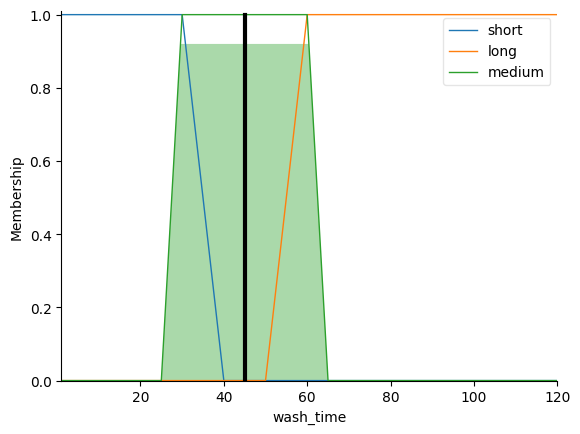

In [14]:
# Compute the wash time given the input values for soil level, load size, and water temperature
two_hundred_parts_per_million = 200
ten_kilograms = 10
fifty_degrees_celsius = 50
precise_wash_time = simulate_wash_time_with_precise_input(
    soil_level_value=two_hundred_parts_per_million,
    load_size_value=ten_kilograms,
    water_temperature_value=fifty_degrees_celsius
)
print(build_wash_time_description(precise_wash_time))
# Visualize the fuzzy set with the highest membership value for the precise wash time
wash_time.view(sim=washing_simulation)

### Simulate wash times with fuzzy inputs

87.44 minute wash time, which is perceived to be a long wash time


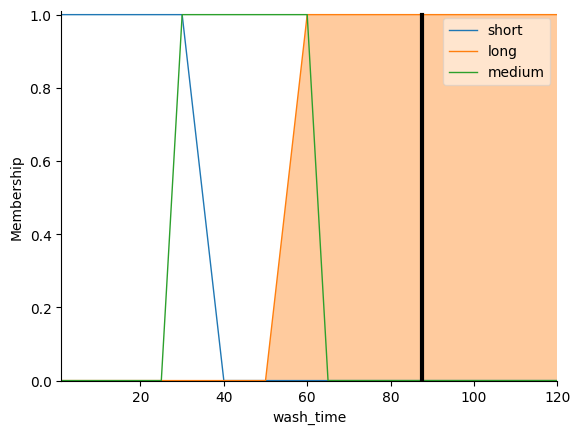

In [15]:
# Given the fuzzy sets of each input value return the wash time
def simulate_wash_time_with_fuzzy_input(
        soil_level_description,
        load_size_description,
        water_temperature_description
    ):
    # Dervice the precise input values from the fuzzy input sets
    precise_soil_level = soil_level.terms[soil_level_description]
    precise_load_size = load_size.terms[load_size_description]
    precise_water_temperature = water_temperature.terms[water_temperature_description]
    # Simulate the wash time with the precise input values
    return simulate_wash_time_with_precise_input(
        precise_soil_level,
        precise_load_size,
        precise_water_temperature
    )

# Compute the was time given the fuzzy input values for soil level, load size, and water temperature
precise_wash_time = simulate_wash_time_with_fuzzy_input(
    soil_level_description='heavy',
    load_size_description='large',
    water_temperature_description='cold'
)
print(build_wash_time_description(precise_wash_time))
wash_time.view(sim=washing_simulation)

In [16]:
input_values = [
    (500, 5, 20),
    (2500, 10, 50),
    (100, 18, 80),
    (5000, 20, 30),
    (2500, 1, 80)
]
print(f"{'Soil Level(ppm)':<16}{'Load Size(kg)':<16}{'Water Temp(℃)':<16}{'Wash Time(m)':<16}")
for soil_level, load_size, water_temperature in input_values:
    wash_time_value = simulate_wash_time_with_precise_input(
        soil_level_value=soil_level,
        load_size_value=load_size,
        water_temperature_value=water_temperature
    )
    print(f"{soil_level:<16}{load_size:<16}{water_temperature:<16}{wash_time_value:<16.0f}")

Soil Level(ppm) Load Size(kg)   Water Temp(℃)   Wash Time(m)    
500             5               20              60              
2500            10              50              45              
100             18              80              21              
5000            20              30              87              
2500            1               80              18              


<table>
  <tr>
    <th colspan="3">Inputs</th>
    <th>Outputs</th>
  </tr>
  <tr>
    <th>Load Size (lbs)</th>
    <th>Soil Level (ppm)</th>
    <th>Water Temp (℃)</th>
    <th>Wash Time (min)</th>
  </tr>
  <tr>
    <td>500</td>
    <td>5</td>
    <td>20</td>
    <td>60</td>
  </tr>
  <tr>
    <td>2500</td>
    <td>10</td>
    <td>50</td>
    <td>45</td>
  </tr>
  <tr>
    <td>100</td>
    <td>18</td>
    <td>80</td>
    <td>21</td>
  </tr>
  <tr>
    <td>5000</td>
    <td>20</td>
    <td>30</td>
    <td>87</td>
  </tr>
  <tr>
    <td>2500</td>
    <td>1</td>
    <td>80</td>
    <td>18</td>
  </tr>
</table>